# What is the most optimal skill to learn for Data Analysts?
## Methodology:

1.Continue from the last notebook to calculate the percentage of job postings that mention each skill.

2.Visualize the relationship between median salary and percentage of postings requiring each skill.

3.Analyze whether certain technologies are more prevalent in specific roles or industries.

### Import Libraries and Data
Import the libraries, data and change the job_posted_date to a datetime type.

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Clean Data:
Filters the original dataset to keep only rows where the job title is `Data Analyst` and the country is `United States`, creating a new DataFrame `df_DA_US`.
It then drops rows with missing values in the `salary_year_avg` column to ensure accurate analysis.
Next, it uses the explode method on the `job_skills` column to transform each list of skills into separate rows, creating the DataFrame `df_DA_US_exploded`.
Finally, it displays the first 5 entries of the `salary_year_avg` and `job_skills` columns for inspection.

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


### Calculate Percent of Job Postings that Have Each Skill
1.This section groups the exploded DataFrame by job_skills, calculating two metrics for each skill:

2.The count of job postings requiring that skill

3.The median yearly salary for those postings

In [3]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


### Median Salary vs Percent Skill Demand
Filters for Data Analyst skills that exceed a certain percentage (skill_limit).

In [4]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

Create a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.

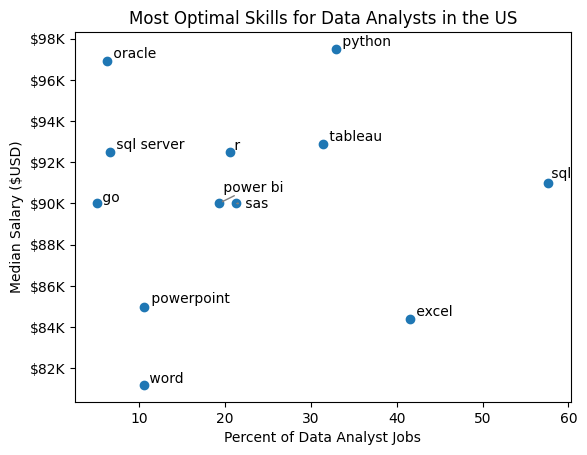

In [6]:
from adjustText import adjust_text

# Scatter plot: Percent of jobs vs Median salary
plt.scatter(
    df_DA_skills_high_demand['skill_percent'], 
    df_DA_skills_high_demand['median_salary']
)

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

# Format y-axis ticks to show salary in thousands with '$' and 'K'
ax = plt.gca()
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: f'${int(y / 1000)}K')
)

# Add skill labels near the points and store them for adjustment
texts = []
for i, skill in enumerate(df_DA_skills_high_demand.index):
    x = df_DA_skills_high_demand['skill_percent'].iloc[i]
    y = df_DA_skills_high_demand['median_salary'].iloc[i]
    texts.append(plt.text(x, y, " " + skill))

# Adjust text labels to prevent overlap, with arrows pointing to points
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()


### Bonus: Coloring by Technology
First, remove duplicate rows and any rows containing missing values. Then, combine all dictionaries (from a column containing skill-technology mappings) into a single consolidated dictionary. For keys (skills) appearing multiple times, sum or merge their values. To avoid duplicated entries within each skill’s attribute list, convert the values to a set and back to a list, ensuring each attribute is unique. The final output is a dictionary where each key is a skill and each value is a list of unique technology attributes associated with that skill.



In [7]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['powerpoint',
  'dax',
  'cognos',
  'sap',
  'ssis',
  'spss',
  'power bi',
  'ms access',
  'spreadsheet',
  'powerbi',
  'microstrategy',
  'visio',
  'qlik',
  'nuix',
  'excel',
  'datarobot',
  'looker',
  'alteryx',
  'tableau',
  'esquisse',
  'sharepoint',
  'outlook',
  'ssrs',
  'word',
  'msaccess',
  'splunk',
  'sas',
  'sheets'],
 'programming': ['clojure',
  'nosql',
  'erlang',
  'scala',
  'rust',
  't-sql',
  'elixir',
  'solidity',
  'kotlin',
  'javascript',
  'vb.net',
  'python',
  'visualbasic',
  'html',
  'vba',
  'lua',
  'apl',
  'c#',
  'julia',
  'sql',
  'golang',
  'sass',
  'visual basic',
  'f#',
  'c',
  'crystal',
  'r',
  'mongo',
  'perl',
  'typescript',
  'haskell',
  'powershell',
  'cobol',
  'shell',
  'swift',
  'dart',
  'css',
  'mongodb',
  'go',
  'matlab',
  'ruby',
  'fortran',
  'assembly',
  'delphi',
  'no-sql',
  'objective-c',
  'java',
  'bash',
  'ocaml',
  'pascal',
  'lisp',
  'sas',
  'groovy',
  'c++',
  '

This code converts a dictionary into a pandas DataFrame, then explodes the 'skills' column, creating multiple rows for each 'technology' entry if it contains multiple skills.

In [8]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,powerpoint
0,analyst_tools,dax
0,analyst_tools,cognos
0,analyst_tools,sap
0,analyst_tools,ssis
...,...,...
9,sync,symphony
9,sync,webex
9,sync,zoom
9,sync,twilio


Merges two DataFrames, `df_DA_skills` and df_technology, based on the columns `job_skills` and `skills` respectively, creating a new DataFrame `df_DA_skills_tech`.

In [9]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,100000.0,0.022989,libraries,theano
170,1,65000.0,0.022989,programming,typescript
171,1,147500.0,0.022989,cloud,vmware
172,1,65000.0,0.022989,webframeworks,vue


Filters `df_DA_skills_tech` to select rows where the `percent` column exceeds a specified threshold, storing the result in `df_DA_skills_tech_high_demand`.

In [10]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

Plot the results in a scatter plot, coloring the points based on the `technology` column.

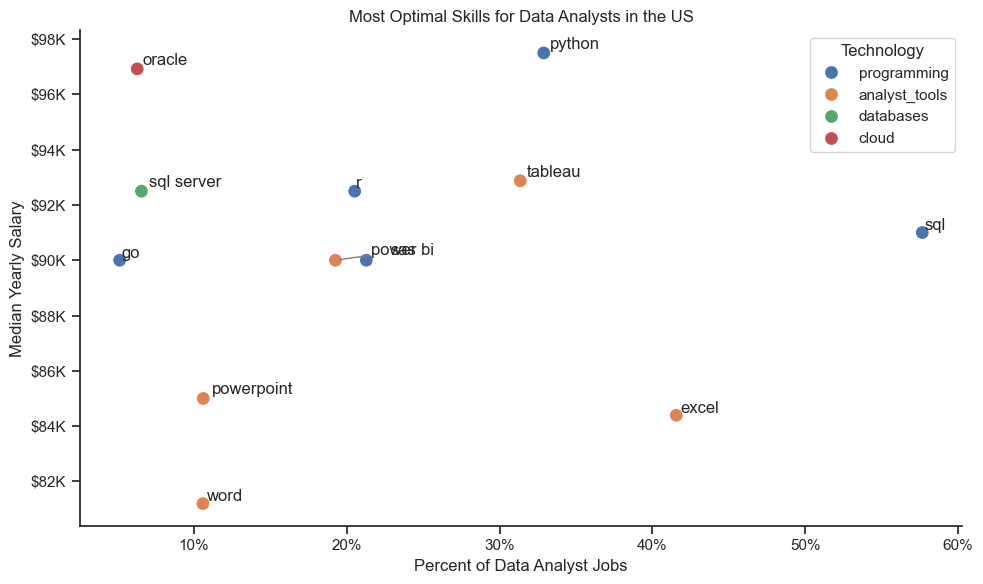

In [22]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology',
    s=100
)

sns.despine()
sns.set_theme(style='ticks')


# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()